In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


plt.style.use('fivethirtyeight')

%matplotlib inline

params = {'legend.fontsize': 14,
          'figure.figsize': (15, 8),
         'axes.labelsize': 14,
         'axes.titlesize':14,
         'xtick.labelsize':14,
         'ytick.labelsize':14,
         'axes.facecolor': 'white',
         'axes.edgecolor': 'white',
         'axes.grid': 'False',
         'figure.facecolor': 'white'}
plt.rcParams.update(params)

In [117]:
# Leer datos de siniestralidad 2019 Y 2020
all_files = ['2019_Accidentalidad.csv', '2020_Accidentalidad.csv']

acc_from_each_file = (pd.read_csv(f,encoding = 'iso-8859-1',delimiter = ';') for f in all_files)
acc = pd.concat(acc_from_each_file, ignore_index=True)

# Dejar solo filas de heridos graves (3), fallecidos (3) o leves (resto de valores)
acc = acc[acc['LESIVIDAD*'].isin([ 1, 2, 3 ,4. ,5 ,6, 7])]

# Contar el nº de implicados por mes y ordenar de más antiguo a más reciente
acc['YearMonth'] = pd.to_datetime(acc['FECHA'],format='%d/%m/%Y').map(lambda dt: dt.replace(day=1))

res = acc['YearMonth'].value_counts()
res_19_20 = res.sort_index()

In [118]:
# Leer datos de siniestralidad 2010 a 2018
all_files = range(10,19)
acc18_from_each_file = (pd.read_csv("300228-" + str(f) + "-accidentes-trafico-detalle.csv"
                                  ,encoding = 'iso-8859-1',delimiter = ';') for f in all_files)
acc18 = pd.concat(acc18_from_each_file, ignore_index=True)

# Eiminar espacios finales en todas las columnas tipo texto
acc18  = acc18 .apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Dejar solo filas de heridos graves (HG) ,fallecidos (MT) o heridos leves (HL)
acc18 = acc18[acc18['LESIVIDAD'].isin(['HL','HG','MT'])]

# Contar el nº de implicados por mes y ordenar de más antiguo a más reciente
acc18['YearMonth'] = pd.to_datetime(acc18['FECHA'],format='%d/%m/%Y').map(lambda dt: dt.replace(day=1))

res = acc18['YearMonth'].value_counts()
res_10_18 =res.sort_index()

In [119]:
"""
Unir la información de los fichero con formato antiguo (2010 a 2018) 
con los de formato nuevo (2019 y 2020).
"""
res = pd.concat([res_10_18, res_19_20])

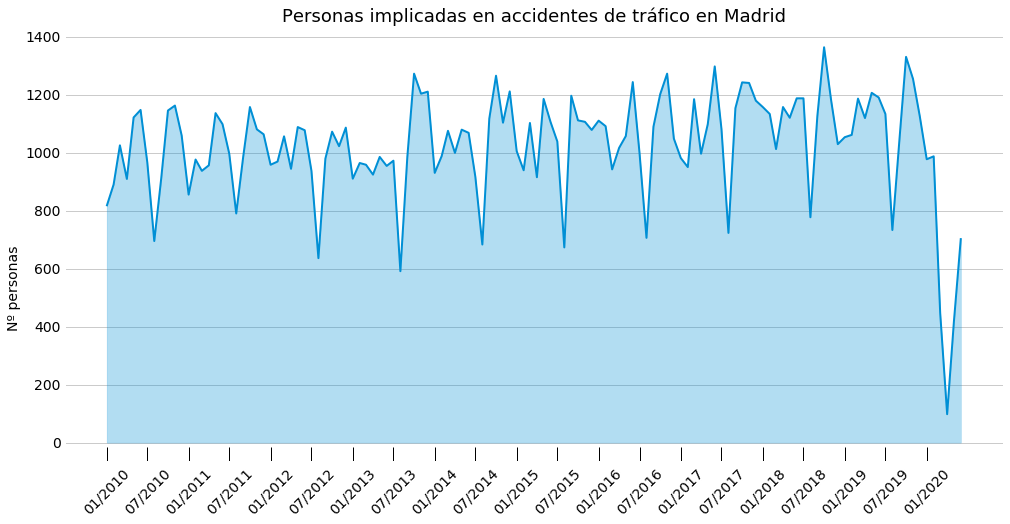

In [120]:
# Dibujar el gráfico de evolución de implicados en accidentes de tráfico
x = res.index
y = res

labels = []
# pretty labels
for n in x[::6]:
    labels.append(n.strftime('%m/%Y'))
    for m in range(5):
        labels.append('')

plt.plot(x, y,lw = 2, ls='-', alpha=1, color=sns.color_palette()[0])
plt.fill_between(x, 0, y, alpha=0.3, color=sns.color_palette()[0])

plt.grid(axis='y') 
plt.xticks(x[::6], labels[::6], rotation=45)
plt.tick_params(axis = 'x',direction='in', length=15, width=1)

#plt.legend()
plt.ylabel('Nº personas', rotation=90, ha = 'right')

plt.title('Personas implicadas en accidentes de tráfico en Madrid',fontsize= 18)
plt.savefig('images/temp_anual.png', bbox_inches='tight', pad_inches=0.3, dpi=220, facecolor='white')
plt.show()